# Data Wrangling with pandas Cheat Sheet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Creating DataFrames

In [2]:
# Specify values for each column
# index를 설정하지 않으면 0부터 시작한다.
df = pd.DataFrame(
    {"a" : [4, 5, 6],
     "b" : [7, 8, 9],
     "c" : [10, 11, 12]},
     index = [1, 2, 3])

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [3]:
# Specify values for each row
df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
     index = [1, 2, 3],
     columns = ["a", "b", "c"])

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [4]:
# Create DataFrame with a MultiIndex
df = pd.DataFrame(
    {   "a" : [4, 5, 6],
        "b" : [7, 8, 9],
        "c" : [10, 11, 12]},
    index = pd.MultiIndex.from_tuples(
        [('d', 1), ('d', 2), ('e', 2)],
        names = ['n', 'v']))

df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## 2. Reshaping Data
Change Layout, Sorting, Reindexing, Renaming

In [5]:
df1 = pd.DataFrame(
    {"a" : [3, 7, 2],
     "b" : [9, 8, 4],
     "c" : [0, 1, 12]},
     index = [1, 2, 3])

df1

,a,b,c
1,3,9,0
2,7,8,1
3,2,4,12


In [6]:
df2 = pd.DataFrame(
    {"a" : [9, 1, 0],
     "b" : [2, 8, 3],
     "c" : [8, 5, 2]},
     index = [1, 2, 3])

df2

,a,b,c
1,9,2,8
2,1,8,5
3,0,3,2


In [7]:
# Gather columns into rows
df1_melt = pd.melt(df1)
df1_melt

,variable,value
0,a,3
1,a,7
2,a,2
3,b,9
4,b,8
5,b,4
6,c,0
7,c,1
8,c,12


In [8]:
# Spread rows into columns
df1_melt.pivot(columns='variable', values='value')

variable,a,b,c
0,3.0,NaN,NaN
1,7.0,NaN,NaN
2,2.0,NaN,NaN
3,NaN,9.0,NaN
4,NaN,8.0,NaN
5,NaN,4.0,NaN
6,NaN,NaN,0.0
7,NaN,NaN,1.0
8,NaN,NaN,12.0


In [9]:
# Append rows of DataFrames
df_concat = pd.concat([df1, df2])
df_concat

,a,b,c
1,3,9,0
2,7,8,1
3,2,4,12
1,9,2,8
2,1,8,5
3,0,3,2


In [10]:
# Append columns of DataFrames
pd.concat([df1, df2], axis=1)

,a,b,c,a,b,c
1,3,9,0,9,2,8
2,7,8,1,1,8,5
3,2,4,12,0,3,2


In [11]:
# Order rows by values of a column (low to high)
df1.sort_values("a")

,a,b,c
3,2,4,12
1,3,9,0
2,7,8,1


In [12]:
# Order rows by values of a column (high to low)
df1.sort_values("a", ascending=False)

,a,b,c
2,7,8,1
1,3,9,0
3,2,4,12


In [13]:
# Rename the columns of a DataFrame
df1_rename = df1.rename(columns = {"a":"first"})
df1_rename

,first,b,c
1,3,9,0
2,7,8,1
3,2,4,12


In [14]:
# Sort the index of a DataFrame (low to high)
df_concat.sort_index()

,a,b,c
1,3,9,0
1,9,2,8
2,7,8,1
2,1,8,5
3,2,4,12
3,0,3,2


In [15]:
# Sort the index of a DataFrame (low to high)
df_concat.sort_index(ascending=False)

,a,b,c
3,2,4,12
3,0,3,2
2,7,8,1
2,1,8,5
1,3,9,0
1,9,2,8


In [16]:
# Sort the columns of a DataFrame (low to high)
df1_rename.sort_index(axis=1)

,b,c,first
1,9,0,3
2,8,1,7
3,4,12,2


In [17]:
# Sort the columns of a DataFrame (high to low)
df1_rename.sort_index(axis=1, ascending=False)

,first,c,b
1,3,0,9
2,7,1,8
3,2,12,4


In [18]:
# Reset index of DataFrame to row numbers, moving index to columns
df_concat.reset_index()

,index,a,b,c
0,1,3,9,0
1,2,7,8,1
2,3,2,4,12
3,1,9,2,8
4,2,1,8,5
5,3,0,3,2


In [19]:
# Reset index of DataFrame to row numbers, removing index
df_concat.reset_index(drop=True)

,a,b,c
0,3,9,0
1,7,8,1
2,2,4,12
3,9,2,8
4,1,8,5
5,0,3,2


In [20]:
# Drop columns from DataFrame
df1.drop(columns=['a', 'b'])

,c
1,0
2,1
3,12


## 3. Subset Observations

In [21]:
# Load example data
iris_df = sns.load_dataset('iris')

### 3.1. rows

In [22]:
# Exatct rows that meet logical criteria
iris_df[iris_df["sepal_length"] > 7]

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


In [23]:
# Remove duplicate rows (only considers columns)
iris_df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
# Randomly select fraction of rows
iris_df.sample(frac=0.5)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
13,4.3,3.0,1.1,0.1,setosa
...,...,...,...,...,...
126,6.2,2.8,4.8,1.8,virginica
51,6.4,3.2,4.5,1.5,versicolor
133,6.3,2.8,5.1,1.5,virginica
77,6.7,3.0,5.0,1.7,versicolor


In [25]:
# Randomly select n rows
iris_df.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
61,5.9,3.0,4.2,1.5,versicolor
37,4.9,3.6,1.4,0.1,setosa
31,5.4,3.4,1.5,0.4,setosa
23,5.1,3.3,1.7,0.5,setosa
83,6.0,2.7,5.1,1.6,versicolor
13,4.3,3.0,1.1,0.1,setosa
114,5.8,2.8,5.1,2.4,virginica
115,6.4,3.2,5.3,2.3,virginica
24,4.8,3.4,1.9,0.2,setosa


In [26]:
# Select and order top n entries
iris_df.nlargest(5, 'petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica


In [27]:
# Select and order bottom n entries
iris_df.nsmallest(5, 'petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [28]:
# Select first n rows (default 5)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# Select last n rows (default 5)
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 3.2. columns

In [30]:
# Select multiple columns with specific names
columns = ['sepal_length', 'sepal_width', 'species']
iris_df[columns].head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [31]:
# Select single column with specific name
iris_df['sepal_width'].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [32]:
iris_df.sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [33]:
# Select columns whose name matches regular expression regex
iris_df.filter(regex='^sepal')

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## 4. Subsets - rows and columns
Use `df.loc[]` and `df.iloc[]` to select only rows, only columns or both.   
Use `df.at[]` and `df.iat[]` to access a single value by row and column.   
First index selects rows, second index columns.

In [34]:
# Select rows 10-20
iris_df.iloc[10:20]

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa


In [35]:
# Select columns in positions 1, 2 and 5 (first column is 0)
iris_df.iloc[:, [0, 2, 3]]

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [36]:
# select all columns between column_name1 and column_name2 (inclusive)
iris_df.loc[:, 'sepal_width':'species']

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa
...,...,...,...,...
145,3.0,5.2,2.3,virginica
146,2.5,5.0,1.9,virginica
147,3.0,5.2,2.0,virginica
148,3.4,5.4,2.3,virginica


In [37]:
# Select rows meeting logical condition, and only the specific columns
iris_df.loc[iris_df['sepal_length'] > 3, ['sepal_length', 'species']]

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [38]:
# Access single value by index
iris_df.iat[1, 2]

1.4

In [39]:
# Access single value by label
iris_df.at[4, 'species']

'setosa'

## 5. Using query
query() allows Boolean expressions for filtering rows

In [40]:
iris_df.query('sepal_length > 7')

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


In [41]:
iris_df.query('sepal_length > 7 and sepal_width < 3')

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica


In [42]:
iris_df.query('species.str.startswith("set")', engine='python')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 6. Summarize Data

In [43]:
# Count number of rows with each unique value of variable
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [44]:
# # of rows in DataFrame
len(iris_df)

150

In [45]:
# Tuple of # of rows, # of columns in DataFrame
iris_df.shape

(150, 5)

In [46]:
# # of distinct values in a column
iris_df['species'].nunique()

3

In [47]:
# Basic descriptrive and statistics for each column (or GroupBy)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


pandas provides a large set of summary functions that operate on different kinds of pandas objects (DataFrame columns, Series, GroupBy, Expanding and Rolling (see below)) and produce single values for each of the groups. When applied to a DataFrame, the result is returned a s apandas Series for each column.

In [48]:
# Sum values of each object
iris_df.sum()

sepal_length                                                876.5
sepal_width                                                 458.6
petal_length                                                563.7
petal_width                                                 179.9
species         setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

In [49]:
# Count non0NA/null values of each object
iris_df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [50]:
# Median value of each object
# 문자열은 계산할 수 없기 때문에 숫자 데이터 컬럼만 선택하여 적용한다.
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [51]:
# Quantiles of each object
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [52]:
# Minimum value in each object
iris_df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [53]:
# Maximum value in each object
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [54]:
# Mean value of each object
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [55]:
# Variance of each object
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [56]:
# Standard deviation of each object
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [57]:
# Apply function to each object
iris_df.apply(np.sum)

sepal_length                                                876.5
sepal_width                                                 458.6
petal_length                                                563.7
petal_width                                                 179.9
species         setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

## 7. Handling Missing Data

In [58]:
# Create DataFrame with a MultiIndex
df = pd.DataFrame(
    {   "a" : [4, 5, 6, pd.NA, pd.NA],
        "b" : [7, 8, 9, 2, pd.NA],
        "c" : [10, 11, 12, 3, pd.NA]},
    index = pd.MultiIndex.from_tuples(
        [('d', 1), ('d', 2), ('e', 2), ('e', 3), ('e', 4)],
        names = ['n', 'v']))

df

a     b     c
n v                  
d 1     4     7    10
  2     5     8    11
e 2     6     9    12
  3  <NA>     2     3
  4  <NA>  <NA>  <NA>

In [59]:
# Drop rows with all column having NA/null data
df.dropna(how= 'all')

a  b   c
n v             
d 1     4  7  10
  2     5  8  11
e 2     6  9  12
  3  <NA>  2   3

In [60]:
# Drop rows with any column having NA/null data
df.dropna(how= 'any')

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [61]:
# Replace all NA/null data with value
df.fillna(1)

C:\Users\kingy\AppData\Local\Temp\ipykernel_11624\527170189.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(1)


a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  1  2   3
  4  1  1   1

In [62]:
# # of NA/null data in each column
df.isnull().sum() 

a    2
b    1
c    1
dtype: int64

In [63]:
# # of not NA/null data in each column
df.notnull().sum() 

a    3
b    4
c    4
dtype: int64

## 8. Make New Columns

In [64]:
# Compute and append one or more new columns
iris_df.assign(Volume = lambda iris_df: iris_df.sepal_length * iris_df.sepal_width)

,sepal_length,sepal_width,petal_length,petal_width,species,Volume
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [65]:
# Add single column
iris_df['Volume'] = iris_df.sepal_length * iris_df.sepal_width
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,Volume
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [66]:
# Bin column into n buckets
pd.qcut(iris_df.Volume, 10, labels=False)

0      5
1      1
2      2
3      1
4      5
      ..
145    7
146    2
147    6
148    8
149    5
Name: Volume, Length: 150, dtype: int64

pandas provides a large set of vector functions that operate on all columns of a DataFrame or a single selected column (a pandas Series). These functions produce vectors of values for each of the columns, or a single Series for the individual Series.

In [67]:
# Element-wise max
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].max(axis=1)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64

In [68]:
# Element-wise min
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].min(axis=1)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [69]:
# Trim values at input thresholds
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].clip(lower=1, upper=5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.5,1.4,1.0
1,4.9,3.0,1.4,1.0
2,4.7,3.2,1.3,1.0
3,4.6,3.1,1.5,1.0
4,5.0,3.6,1.4,1.0
...,...,...,...,...
145,5.0,3.0,5.0,2.3
146,5.0,2.5,5.0,1.9
147,5.0,3.0,5.0,2.0
148,5.0,3.4,5.0,2.3


In [70]:
# Absolute value
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].abs()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 9. Group Data

In [71]:
# Return a GroupBy object, grouped by values in column named "species"
iris_df.groupby(by="species")

In [72]:
# Return a GroupBy object, grouped by values in index level named "5"
iris_df.set_index(['species']).groupby(level="species")

### Additional Groupby functions
All of the summary functions listed above can be applied to a group.

In [73]:
# Size of each group
# count()와 다른 점은 NaN도 포함하여 계산한다.
iris_df.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [74]:
# Aggregate group using function
iris_df.groupby(['species']).agg(['min', 'max', 'mean', 'median'])

sepal_length                    sepal_width                     \
                    min  max   mean median         min  max   mean median   
species                                                                     
setosa              4.3  5.8  5.006    5.0         2.3  4.4  3.428    3.4   
versicolor          4.9  7.0  5.936    5.9         2.0  3.4  2.770    2.8   
virginica           4.9  7.9  6.588    6.5         2.2  3.8  2.974    3.0   

           petal_length                    petal_width                     \
                    min  max   mean median         min  max   mean median   
species                                                                     
setosa              1.0  1.9  1.462   1.50         0.1  0.6  0.246    0.2   
versicolor          3.0  5.1  4.260   4.35         1.0  1.8  1.326    1.3   
virginica           4.5  6.9  5.552   5.55         1.4  2.5  2.026    2.0   

           Volume                          
              min    max     mean  median  
species                                    
setosa      10.35  25.08  17.2578  17.170  
versicolor  10.00  22.40  16.5262  16.385  
virginica   12.25  30.02  19.6846  20.060

The example below can also be applied to groups. In this case, the function is applied on a per-group basis, and the returned vectors are of the length of the original DataFrame.

In [75]:
# Copy with values shifted by 1
iris_df.groupby(['species']).shift(1)

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,NaN,NaN,NaN,NaN,NaN
1,5.1,3.5,1.4,0.2,17.85
2,4.9,3.0,1.4,0.2,14.70
3,4.7,3.2,1.3,0.2,15.04
4,4.6,3.1,1.5,0.2,14.26
...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,22.11
146,6.7,3.0,5.2,2.3,20.10
147,6.3,2.5,5.0,1.9,15.75
148,6.5,3.0,5.2,2.0,19.50


In [76]:
# Copy with values lagged by 1
iris_df.groupby(['species']).shift(-1)

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,4.9,3.0,1.4,0.2,14.70
1,4.7,3.2,1.3,0.2,15.04
2,4.6,3.1,1.5,0.2,14.26
3,5.0,3.6,1.4,0.2,18.00
4,5.4,3.9,1.7,0.4,21.06
...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,15.75
146,6.5,3.0,5.2,2.0,19.50
147,6.2,3.4,5.4,2.3,21.08
148,5.9,3.0,5.1,1.8,17.70


In [77]:
# Ranks with no gaps
iris_df.groupby(['species']).rank(method='dense')

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,9.0,8.0,5.0,2.0,25.0
1,7.0,3.0,5.0,2.0,8.0
2,5.0,5.0,4.0,2.0,12.0
3,4.0,4.0,6.0,2.0,6.0
4,8.0,9.0,5.0,2.0,26.0
...,...,...,...,...,...
145,12.0,7.0,6.0,10.0,22.0
146,9.0,2.0,4.0,6.0,6.0
147,11.0,7.0,6.0,7.0,19.0
148,8.0,11.0,8.0,10.0,29.0


In [78]:
# Ranks. Ties get min rank
iris_df.groupby(['species']).rank(method='min')

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,29.0,29.0,12.0,6.0,31.0
1,17.0,3.0,12.0,6.0,9.0
2,10.0,13.0,5.0,6.0,13.0
3,6.0,9.0,25.0,6.0,6.0
4,21.0,35.0,12.0,6.0,33.0
...,...,...,...,...,...
145,29.0,22.0,17.0,37.0,26.0
146,14.0,2.0,7.0,17.0,7.0
147,25.0,22.0,17.0,22.0,21.0
148,12.0,46.0,21.0,37.0,33.0


In [79]:
# Ranks rescaled to interval [0, 1]
iris_df.groupby(['species']).rank(pct=True)

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,0.65,0.63,0.36,0.40,0.63
1,0.37,0.11,0.36,0.40,0.18
2,0.21,0.30,0.16,0.40,0.27
3,0.15,0.21,0.62,0.40,0.12
4,0.49,0.72,0.36,0.40,0.66
...,...,...,...,...,...
145,0.62,0.55,0.35,0.81,0.52
146,0.33,0.07,0.16,0.38,0.14
147,0.53,0.55,0.35,0.49,0.44
148,0.25,0.93,0.43,0.81,0.66


In [80]:
# Ranks. Ties go to first value
iris_df.groupby(['species']).rank(method='first')

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,29.0,29.0,12.0,6.0,31.0
1,17.0,3.0,13.0,7.0,9.0
2,10.0,13.0,5.0,8.0,13.0
3,6.0,9.0,25.0,9.0,6.0
4,21.0,35.0,14.0,10.0,33.0
...,...,...,...,...,...
145,33.0,31.0,17.0,43.0,26.0
146,19.0,5.0,9.0,21.0,7.0
147,28.0,32.0,18.0,27.0,23.0
148,13.0,47.0,22.0,44.0,33.0


In [81]:
# Cumulative sum
iris_df.groupby(['species']).cumsum()

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,5.1,3.5,1.4,0.2,17.85
1,10.0,6.5,2.8,0.4,32.55
2,14.7,9.7,4.1,0.6,47.59
3,19.3,12.8,5.6,0.8,61.85
4,24.3,16.4,7.0,1.0,79.85
...,...,...,...,...,...
145,304.5,136.8,256.9,93.3,910.20
146,310.8,139.3,261.9,95.2,925.95
147,317.3,142.3,267.1,97.2,945.45
148,323.5,145.7,272.5,99.5,966.53


In [82]:
# Cumulative max
iris_df.groupby(['species']).cummax()

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,5.1,3.5,1.4,0.2,17.85
1,5.1,3.5,1.4,0.2,17.85
2,5.1,3.5,1.4,0.2,17.85
3,5.1,3.5,1.5,0.2,17.85
4,5.1,3.6,1.5,0.2,18.00
...,...,...,...,...,...
145,7.9,3.8,6.9,2.5,30.02
146,7.9,3.8,6.9,2.5,30.02
147,7.9,3.8,6.9,2.5,30.02
148,7.9,3.8,6.9,2.5,30.02


In [83]:
# Cumulative min
iris_df.groupby(['species']).cummin()

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,5.1,3.5,1.4,0.2,17.85
1,4.9,3.0,1.4,0.2,14.70
2,4.7,3.0,1.3,0.2,14.70
3,4.6,3.0,1.3,0.2,14.26
4,4.6,3.0,1.3,0.2,14.26
...,...,...,...,...,...
145,4.9,2.2,4.5,1.4,12.25
146,4.9,2.2,4.5,1.4,12.25
147,4.9,2.2,4.5,1.4,12.25
148,4.9,2.2,4.5,1.4,12.25


In [84]:
# Cumulative product
iris_df.groupby(['species']).cumprod()

,sepal_length,sepal_width,petal_length,petal_width,Volume
0,5.100000e+00,3.500000e+00,1.400000e+00,2.000000e-01,1.785000e+01
1,2.499000e+01,1.050000e+01,1.960000e+00,4.000000e-02,2.623950e+02
2,1.174530e+02,3.360000e+01,2.548000e+00,8.000000e-03,3.946421e+03
3,5.402838e+02,1.041600e+02,3.822000e+00,1.600000e-03,5.627596e+04
4,2.701419e+03,3.749760e+02,5.350800e+00,3.200000e-04,1.012967e+06
...,...,...,...,...,...
145,4.596133e+37,4.560415e+21,1.839827e+34,8.568431e+13,2.096027e+59
146,2.895564e+38,1.140104e+22,9.199137e+34,1.628002e+14,3.301243e+60
147,1.882117e+39,3.420311e+22,4.783551e+35,3.256004e+14,6.437424e+61
148,1.166912e+40,1.162906e+23,2.583118e+36,7.488809e+14,1.357009e+63


## 10. Windows

In [85]:
# Return an Expanding object allowing summary functions to be applied cumulatively
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].expanding()

Expanding [min_periods=1,axis=0,method=single]

In [86]:
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].expanding().sum()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,10.0,6.5,2.8,0.4
2,14.7,9.7,4.1,0.6
3,19.3,12.8,5.6,0.8
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,851.6,446.7,543.0,171.9
146,857.9,449.2,548.0,173.8
147,864.4,452.2,553.2,175.8
148,870.6,455.6,558.6,178.1


In [87]:
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].expanding().min()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.0,1.3,0.2
3,4.6,3.0,1.3,0.2
4,4.6,3.0,1.3,0.2
...,...,...,...,...
145,4.3,2.0,1.0,0.1
146,4.3,2.0,1.0,0.1
147,4.3,2.0,1.0,0.1
148,4.3,2.0,1.0,0.1


In [88]:
# Return a Rolling object allowing summary functions to be applied to windows of length n
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

In [89]:
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].rolling(3).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,14.7,9.7,4.1,0.6
3,14.2,9.3,4.2,0.6
4,14.3,9.9,4.2,0.6
...,...,...,...,...
145,20.2,9.5,16.8,7.1
146,19.7,8.8,15.9,6.7
147,19.5,8.5,15.4,6.2
148,19.0,8.9,15.6,6.2


## 11. Plotting

<Axes: ylabel='Frequency'>

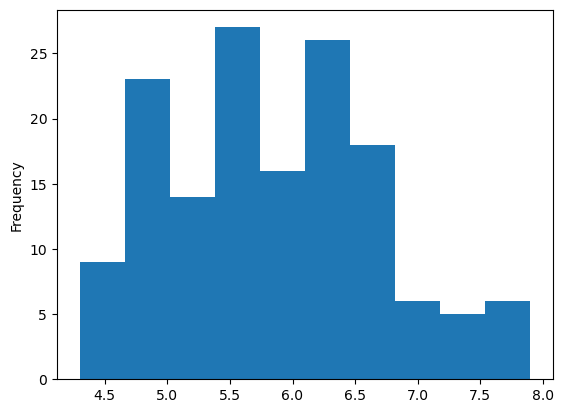

In [90]:
iris_df['sepal_length'].plot.hist()

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

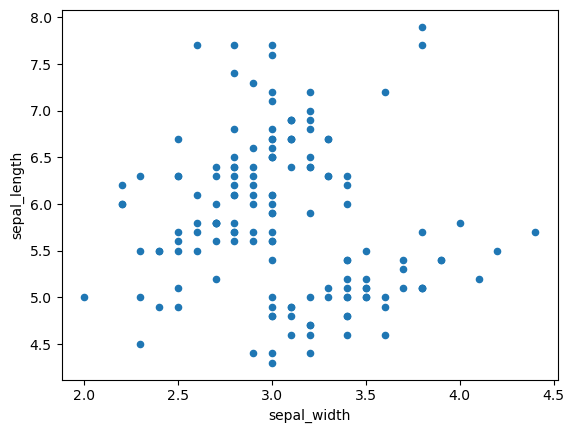

In [91]:
iris_df.plot.scatter(x='sepal_width', y='sepal_length')

## 12. Combine Data Sets

In [92]:
# Create new example DataFrames
adf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
     "x2" : [1, 2, 3]})

bdf = pd.DataFrame(
    {"x1" : ['A', 'B', 'D'],
     "x3" : [True, False, True]})

display(adf, bdf)

,x1,x2
0,A,1
1,B,2
2,C,3


,x1,x3
0,A,True
1,B,False
2,D,True


### Standard Joins

In [93]:
# Join matching rows from bdf to adf
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,True
1,B,2,False
2,C,3,NaN


In [94]:
# Join matching rows from adf to bdf
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,True
1,B,2.0,False
2,D,NaN,True


In [95]:
# Join data. Retin only rows in both sets
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,True
1,B,2,False


In [96]:
# Join data. Retin all values, all rows
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,True
1,B,2.0,False
2,C,3.0,NaN
3,D,NaN,True


### Filtering Joins

In [97]:
# All rows in adf that have a match in bdf
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [98]:
# All rows in adf that do not have a match in bdf
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


### Set-like Operations

In [99]:
# Create new example DataFrames
ydf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
     "x2" : [1, 2, 3]})

zdf = pd.DataFrame(
    {"x1" : ['B', 'C', 'D'],
     "x2" : [2, 3, 4]})

display(ydf, zdf)

,x1,x2
0,A,1
1,B,2
2,C,3


,x1,x2
0,B,2
1,C,3
2,D,4


In [100]:
# Rows that appear in both ydf and zdf (Intersection(
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [101]:
# Rows that appear in either or both ydf and zdf (Union)
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [102]:
# Rows that appear in ydf but not zdf (Setdiff)
# indicator 옵션을 활용해 원하는 데이터를 선택할 수 있다
pd.merge(ydf, zdf, how='outer', indicator=True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [103]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge =="left_only"')

,x1,x2,_merge
0,A,1,left_only


In [104]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge =="left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1
